In [2]:
import meep as mp
from meep import mpb
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from solvers import triangular_with_defect, gaas

ms = triangular_with_defect()
ms.num_bands = 31
ms.k_points = [mp.Vector3(0., 0.5), ]


radii = np.linspace(0.2, 0.7, 40)
defect_freqs = np.zeros((6, radii.size))

for e, r in enumerate(radii):
    j = 0
    defect = mp.Cylinder(r, material=gaas)
    ms.geometry.append(defect)
    ms.run_tm()

    for i, freq in enumerate(ms.get_freqs()):
        if 0.229 < freq < 0.307:
            defect_freqs[j, e] = freq
            j += 1

print(defect_freqs)

Initializing eigensolver data
Computing 31 bands with 1e-07 tolerance
1 k-points
  Vector3<0.0, 0.5, 0.0>
elapsed time for initialization: 0.13026714324951172
Outputting epsilon.h5...
elapsed time for k point: 16.155841827392578
total elapsed time for run: 16.3524272441864
done
Initializing eigensolver data
Computing 31 bands with 1e-07 tolerance
1 k-points
  Vector3<0.0, 0.5, 0.0>
elapsed time for initialization: 0.17089390754699707
Outputting epsilon.h5...
elapsed time for k point: 19.923048734664917
total elapsed time for run: 20.16662096977234
done
Initializing eigensolver data
Computing 31 bands with 1e-07 tolerance
1 k-points
  Vector3<0.0, 0.5, 0.0>
elapsed time for initialization: 0.16405224800109863
Outputting epsilon.h5...
elapsed time for k point: 15.560869216918945
total elapsed time for run: 15.793630838394165
done
Initializing eigensolver data
Computing 31 bands with 1e-07 tolerance
1 k-points
  Vector3<0.0, 0.5, 0.0>
elapsed time for initialization: 0.14916110038757324
O

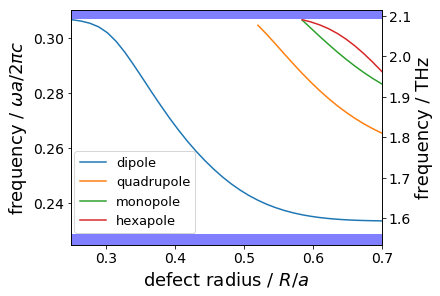

In [31]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['legend.fontsize'] = 13

new_freqs = defect_freqs.copy()
new_freqs[new_freqs == 0] = np.nan
fig, ax = plt.subplots(constrained_layout=True)
labels = ['dipole', 'quadrupole', 'monopole', 'hexapole']
for j, freq in enumerate([f for i, f in enumerate(new_freqs) if i not in (1,3)]):
    ax.plot(radii, freq, label=labels[j])
bottom_limit = 0.225
top_limit = 0.31
ax.set_ylim(bottom=bottom_limit, top=top_limit)
ax.set_xlim([0.25, radii[-1]])
axy = ax.twinx()
axy.set_ylim(bottom=bottom_limit*3e8/4.4e-5*1e-12, top=top_limit*3e8/4.4e-5*1e-12)
axy.set_ylabel('frequency / THz')
ax.fill_between(radii, 0.307, 0.35, facecolor='blue', alpha=0.5)
ax.fill_between(radii, 0.2, 0.229, facecolor='blue', alpha=0.5)
ax.set_xlabel(r'defect radius / $R/a$')
ax.set_ylabel(r'frequency / $\omega a/2\pi c$')
ax.legend(loc=(0.01, 0.05))
fig.savefig('modes_vs_def_radius.pdf')